# **Introducción**

**Contexto de Negocio**

¿Cuáles son las razones por las que las personas pueden cancelar las reservas de hotel?
Los nuevos canales de reserva online en hoteles han cambiado drásticamente la gestion de reserva y el comportamiento de los clientes. Un gran numero de reservas de hotel son modificadas diariamente debido a cancelaciones o abstenciones. Las razones típicas de cancelaciones son por cambio de planes, conflictos de programación, entre otras. Esto a menudo se hace más fácil por la opción de hacerlo de forma gratuita o, preferiblemente, a un bajo costo, lo que es beneficioso para los huéspedes del hotel, pero es un factor menos beneficioso y que posiblemente aumente los costos para los hoteles. 

El costo de la cancelación de las reservas recae en el hotel, donde debe disponer de tiempo y recursos para resolver el problema. ¿Cómo podemos averiguar qué reservas tienen una mayor probabilidad de ser canceladas para que podamos tomar medidas preventivas para evitar que se desperdicie tiempo y recursos adicionales?


**Problema de Negocio**

Debemos responder, ¿Qué características son más importantes para determinar si un cliente cancelara una reserva?

**Contexto analítico**

Tenemos disponible los siguientes datos que han sido recopilados por la empresa:
1.	El archivo “Hotel Reservations.csv” contiene el historial de las reservas realizadas en el Hotel
Como primer paso, (1) se analizaran los datos existentes, detectando posibles deficiencias, (2) se extraerán los datos y se realizara limpieza de datos, EDA, entre otros y por ultimo (3) se creara un modelo predictivo en base a la identificación de patrones.


**Procedimiento de análisis**

El trabajo se enfocara en un modelo de predicciones para luego interpretar los datos obtenidos, con la finalidad de detectar la probabilidad de cancelacion de las reservas.
En una primera etapa, verificaremos la/las variables que mejor explican si un cliente tiene tendencia a cancelar la reseva, como puede cantidad de personas, hijos, pedidos especiales, forma de reserva, entre otras.
Una vez definidas las variables claves armaremos los modelos y seleccionaremos el que mejor se ajuste a la realidad del negocio

Mediante el modelo obtenido, el hotel podrá predecir la probabilidad de cancelacion de reservas de los **clientes**, con el fin de personalizar las campañas publicitarias y realizar mejor en los productos, servicios y atención brindada.

# **Importacion de datos y visualizaciones**


In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.metrics import f1_score


url = "https://raw.githubusercontent.com/AndresPittini/Proyect-Coder/main/Hotel%20Reservations.csv"
df = pd.read_csv(url)
df= df.drop("Booking_ID", axis=1)
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [2]:
df.shape

(36275, 18)

In [ ]:
df.info()

In [ ]:
df.columns

In [5]:
df['booking_status'] = df['booking_status'].replace({"Not_Canceled":0, "Canceled":1})

Convertimos a codigo binario

1= No cancelado
0= Cancelado

In [6]:
Parametros = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space','room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month', 'arrival_date',
              'market_segment_type', 'repeated_guest','no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled', 'avg_price_per_room', 'no_of_special_requests']

Objetivo = 'booking_status'

In [7]:
num_df=df[["no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights","required_car_parking_space","lead_time","arrival_year","arrival_month","arrival_date","repeated_guest",
           "no_of_previous_cancellations","no_of_previous_bookings_not_canceled","avg_price_per_room","no_of_special_requests","booking_status"]] 

In [ ]:
num_df['avg_price_per_room'] = num_df['avg_price_per_room'].astype(int)

In [9]:
cat_df=df[['type_of_meal_plan','room_type_reserved','market_segment_type']]

**Separamos los datos en dos categorias, numericos y categoricos.**

In [ ]:
num_df.info()

In [ ]:
num_df.head()

In [ ]:
cat_df.head()

In [ ]:
df.booking_status.value_counts()

In [ ]:
num_df.describe().T

# **Exploratory Data Analysis (EDA)**


In [ ]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize = (8, 5))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr_matrix, cmap=colormap, annot=True, fmt='.1f')
fig.show()

In [ ]:
abs(corr_matrix['booking_status']).sort_values(ascending=False)

Eliminamos el dia y mes de llegada, dado que tienen poca correlacion con el estado de la reserva

In [17]:
del(num_df['arrival_date'])

In [18]:
del(num_df['arrival_month'])

In [ ]:
num_df.head()

In [ ]:
df.hist(bins=10, figsize=(13, 12))
plt.show()

Observaciones:

1-En su mayoria, las reservas realizadas son para 2 huespedes.

2-Cerca del 90% de las reservas, no incluyen hijos.

3-La mitad de las reservas, incluyen al menos 1 dia de fin de semana

4-Parking para vehiculo no es algo muy solicitado

5-El 50% de las reservas se realizan dentro de los 60 dias previos al check in

6-Disponemos de pocos datos del 2017, puede suceder que se comenzo a mitad de año o posterior.

7-Los meses de Agosto-Diciembre son los mas concurridos

8-No existe una tendencia marcada en el dia del mes

9-Los clientes no suelen repetir alojamiento en el mismo Hotel

10-Los clientes no suelen cancelar el alojamiento una vez que reservaron.

11-El precio promedio por noche ronda los 100 dolares

12-Cerca de la mitad de las reservas, tiene al menos un pedido especial.

**13-Una tercera parte de las reservas, son canceladas**


In [ ]:
sns.histplot(x="avg_price_per_room", hue="booking_status", data=df, kde=True, palette="dark",bins=180)
plt.ylim(0,1700)
plt.xlim(0,300)
plt.title("Precio promedio por Noche");

In [ ]:
pd.pivot_table(df, index = 'booking_status', values = ['avg_price_per_room'])

El costo promedio de las reservas canceladas ascienden a USD 110 contra USD 100 de promedio por reserva concretada. 

In [ ]:
sns.countplot(x='type_of_meal_plan', hue="booking_status", data=df, palette="dark")
plt.title("Plan de comida")
plt.tight_layout()


El plan de comida Nro 1 es el mas solicitado, tanto por quienes se hospedan en el Hotel como quienes cancelan.

In [ ]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='market_segment_type', hue="booking_status", data=df, palette="dark")
plt.title("Segmento de mercado")
plt.show()

La mayoria de las reservas y cancelaciones se realizan de forma Online

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.countplot(x='room_type_reserved', hue="booking_status", data=df, palette="dark")
plt.title("Tipo de habitacion")
plt.show()

La habitacion mas reservada es la Nro 1 y la Nro 4.

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "lead_time", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

Podemos observar que quienes cancelan, suelen reservar con mayor anterioridad a la fecha del check in.

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="arrival_year", y= "avg_price_per_room", hue="booking_status")
plt.legend(loc = "upper center", bbox_to_anchor=(0.5,1.02),ncol=3, fancybox=True, shadow=True)

No se observan diferencias de precios que indiquen una tendencia a cancelar la reserva

# **Modelos**

In [29]:
le = LabelEncoder()

for col in df.columns:
	if df[col].dtype == 'object':
		df[col] = le.fit_transform(df[col])

In [ ]:
for col in df.columns:
    df[col] = pd.to_numeric(df[col], downcast='unsigned')
    
df.info()

In [ ]:
sm = SMOTE(random_state=42)
X, y = sm.fit_resample(df[Parametros], df[Objetivo])
sns.countplot(y)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [33]:
def plot_cm(model, X, y, format='.3f'):
    """Plot confusion matrix"""    
    ConfusionMatrixDisplay.from_estimator(model, X, y,values_format=format,cmap='Blues',normalize='true')
    plt.show()

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
plot_cm(dt, X_test, y_test)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
plot_cm(rf, X_test, y_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
plot_cm(lr, X_test, y_test)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
f1_score(y_test, y_pred)

In [ ]:
plot_cm(knn, X_test, y_test)

In [46]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
f1_score(y_test, y_pred)

0.6510511882998171

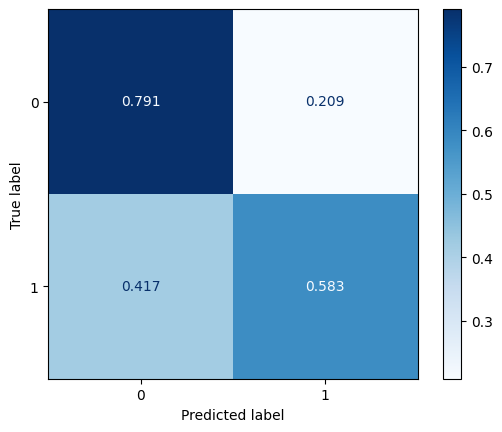

In [50]:
plot_cm(svm, X_test, y_test)

In [51]:
y_pred = rf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      4872
           1       0.93      0.91      0.92      4884

    accuracy                           0.92      9756
   macro avg       0.92      0.92      0.92      9756
weighted avg       0.92      0.92      0.92      9756

